In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [20]:
# Define the features and the outcome
# make sure data are evenly divided
rows = heartdisease_df.shape[0] - heartdisease_df.shape[0] % 2 
df = heartdisease_df.iloc[:rows, :]

X = df.iloc[:, :13]
y = df.iloc[:, 13]
print(X)
# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)
print(len(y))

        0    1    2      3      4    5    6      7    8    9   10   11   12
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0
5    56.0  1.0  2.0  120.0  236.0  0.0  0.0  178.0  0.0  0.8  1.0  0.0  3.0
6    62.0  0.0  4.0  140.0  268.0  0.0  2.0  160.0  0.0  3.6  3.0  2.0  3.0
7    57.0  0.0  4.0  120.0  354.0  0.0  0.0  163.0  1.0  0.6  1.0  0.0  3.0
8    63.0  1.0  4.0  130.0  254.0  0.0  2.0  147.0  0.0  1.4  2.0  1.0  7.0
9    53.0  1.0  4.0  140.0  203.0  1.0  2.0  155.0  1.0  3.1  3.0  0.0  7.0
10   57.0  1.0  4.0  140.0  192.0  0.0  0.0  148.0  0.0  0.4  2.0  0.0  6.0
11   56.0  0.0  2.0  140.0  294.0  0.0  2.0  153.0  0.0  1.3  2.0  0.0  3.0
12   56.0  1

In [21]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)


In [22]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)
print(clusters)

[0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1
 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1
 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0
 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0
 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1
 0 1 1 0 1 0]


In [23]:
print(y)

[1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1
 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1
 0 0 0 0 0 0]


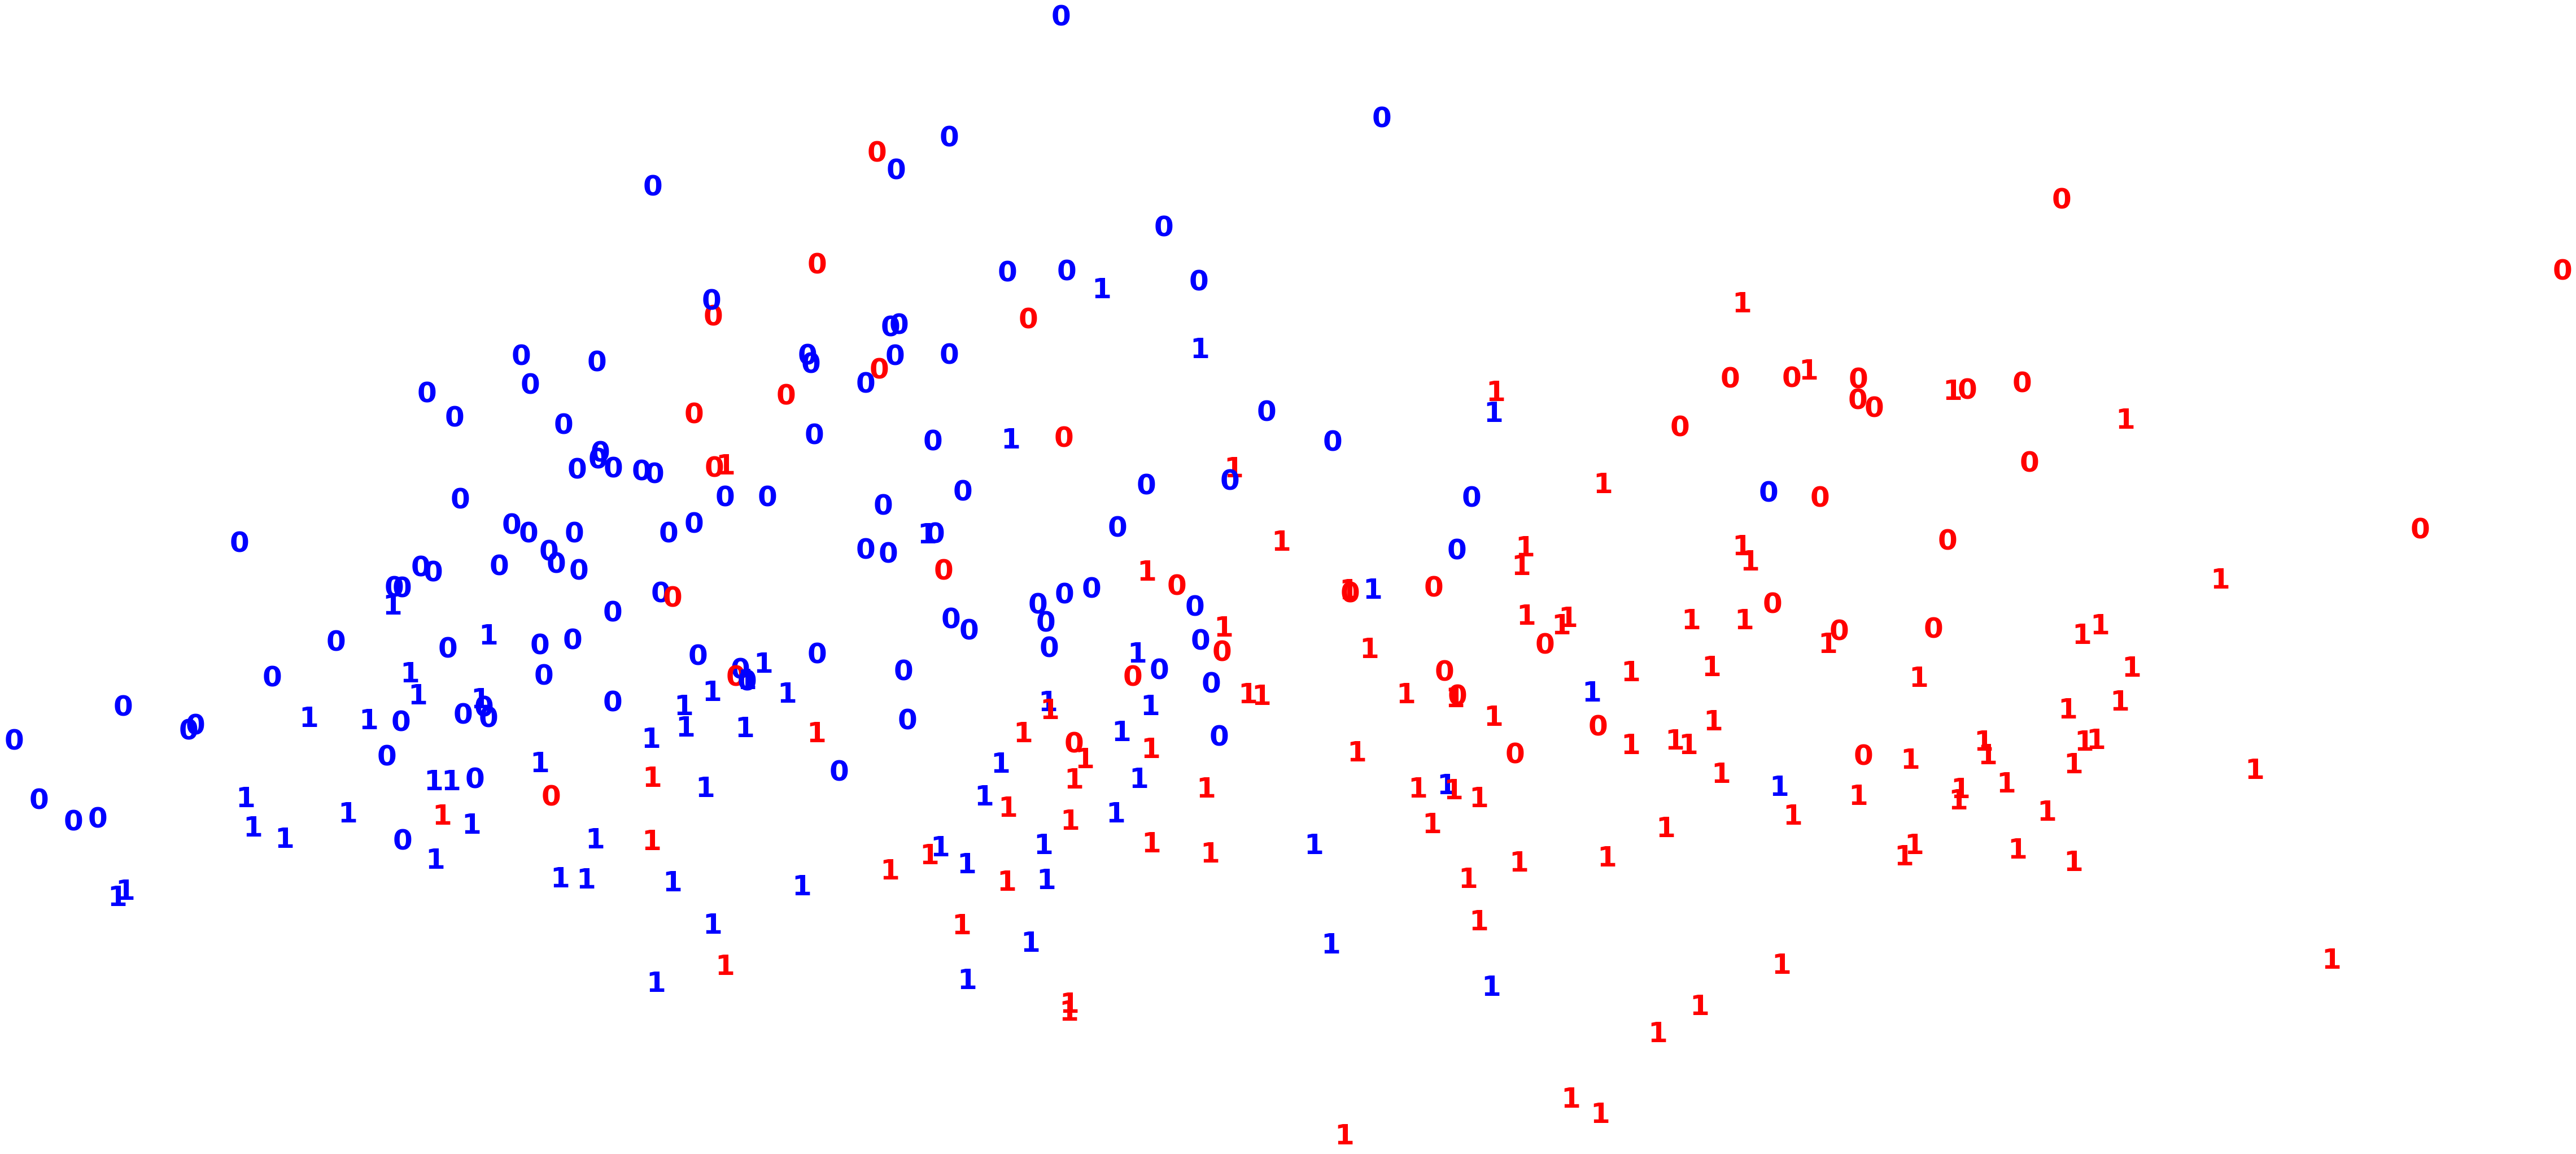

In [24]:
# apply PCA for visualization
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'

for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1],str(clusters[i]), color=colours[y[i]], fontdict={'weight':'bold', 'size': 50})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# ??? question why color= colors[y[i]], why can assign a value from y to color

In [32]:
print(metrics.adjusted_rand_score(y,clusters))
print(metrics.silhouette_score(X_std, clusters, metric='euclidean'))

# adjusted rand score and silhouette score are pretty small, which means the this hierarchical clustering model 
# with n_clusters=2 is not performaing well

0.14457486386986915
0.1377396413078055


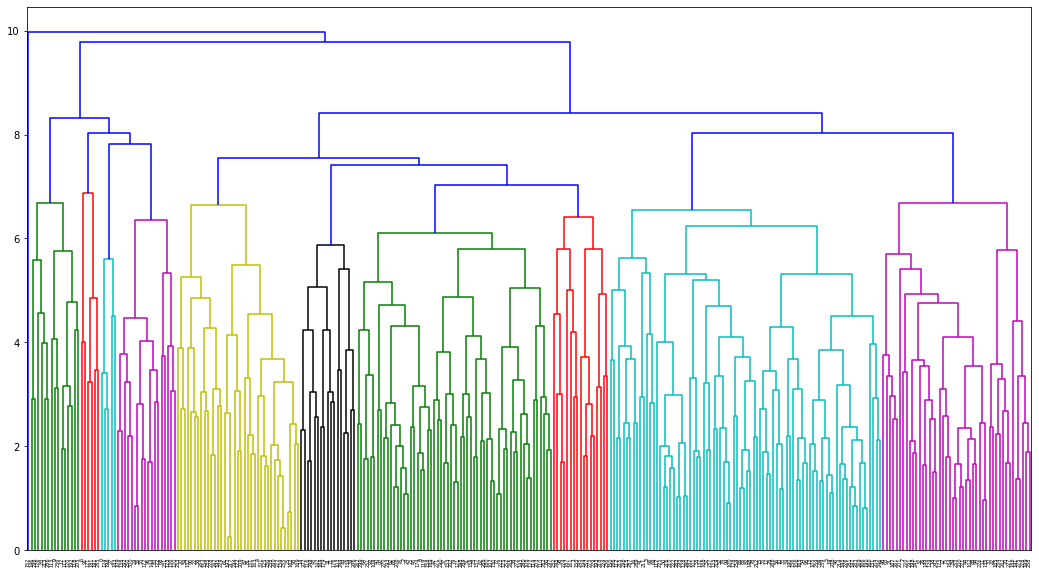

In [26]:
plt.figure(figsize=(18,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [ ]:
# change the linkage method to ward and 


In [35]:
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)
print(clusters)

[0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1
 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1
 0 1 1 0 0 1]


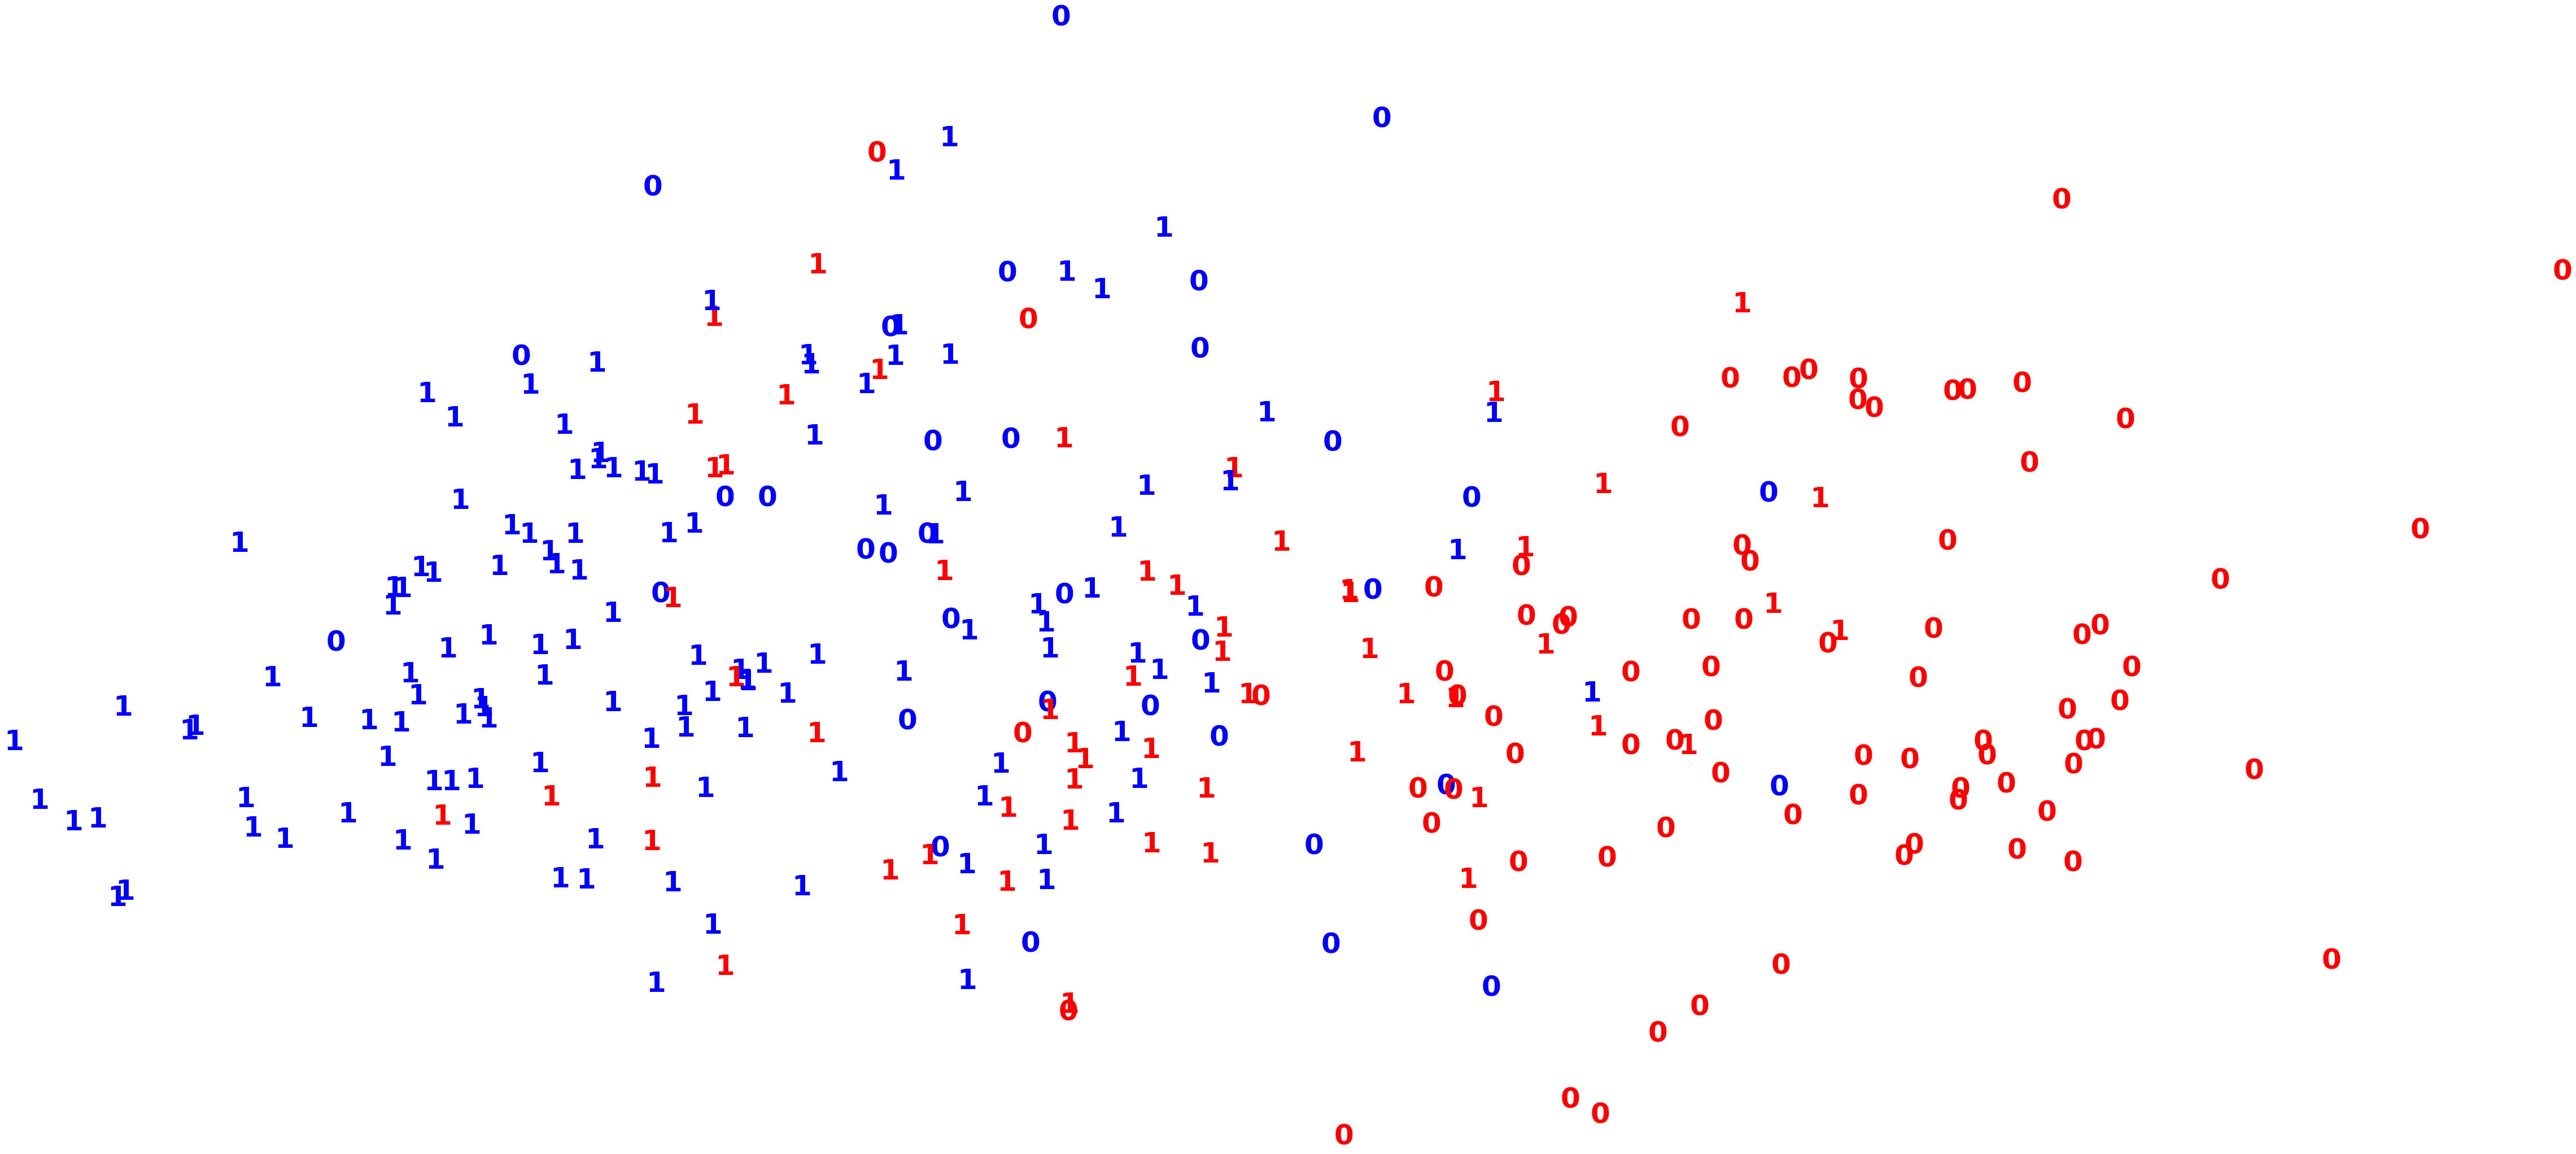

In [36]:
# apply PCA for visualization
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'

for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1],str(clusters[i]), color=colours[y[i]], fontdict={'weight':'bold', 'size': 50})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# ??? question why color= colors[y[i]], why can assign a value from y to color

In [37]:
print(metrics.adjusted_rand_score(y,clusters))
print(metrics.silhouette_score(X_std, clusters, metric='euclidean'))
# the scores increased comparing to the method "complete", but still low values

0.14457486386986915
0.1377396413078055


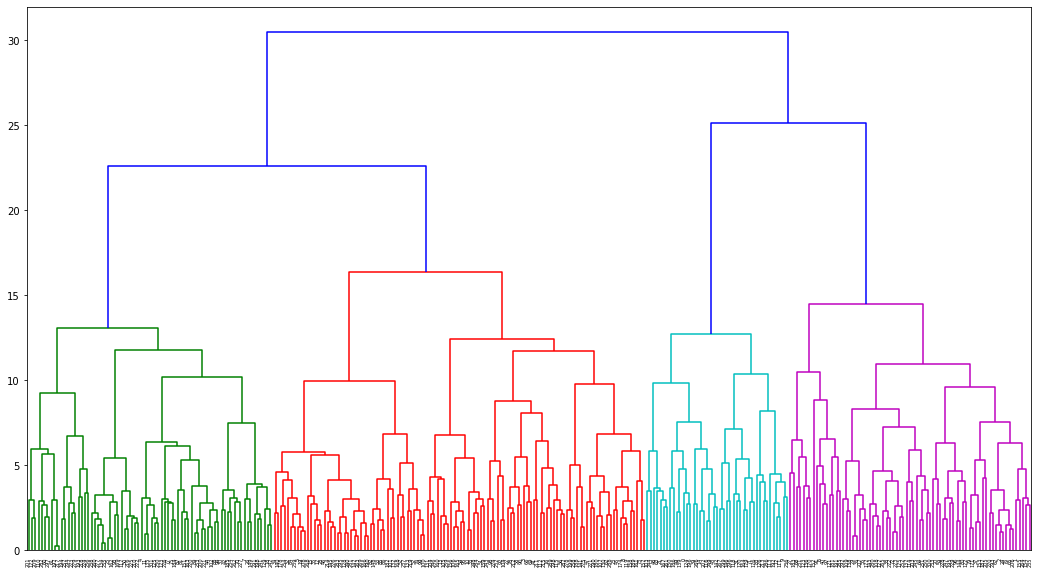

In [38]:
plt.figure(figsize=(18,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

In [ ]:
# change to method "average"


In [40]:
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='manhattan',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


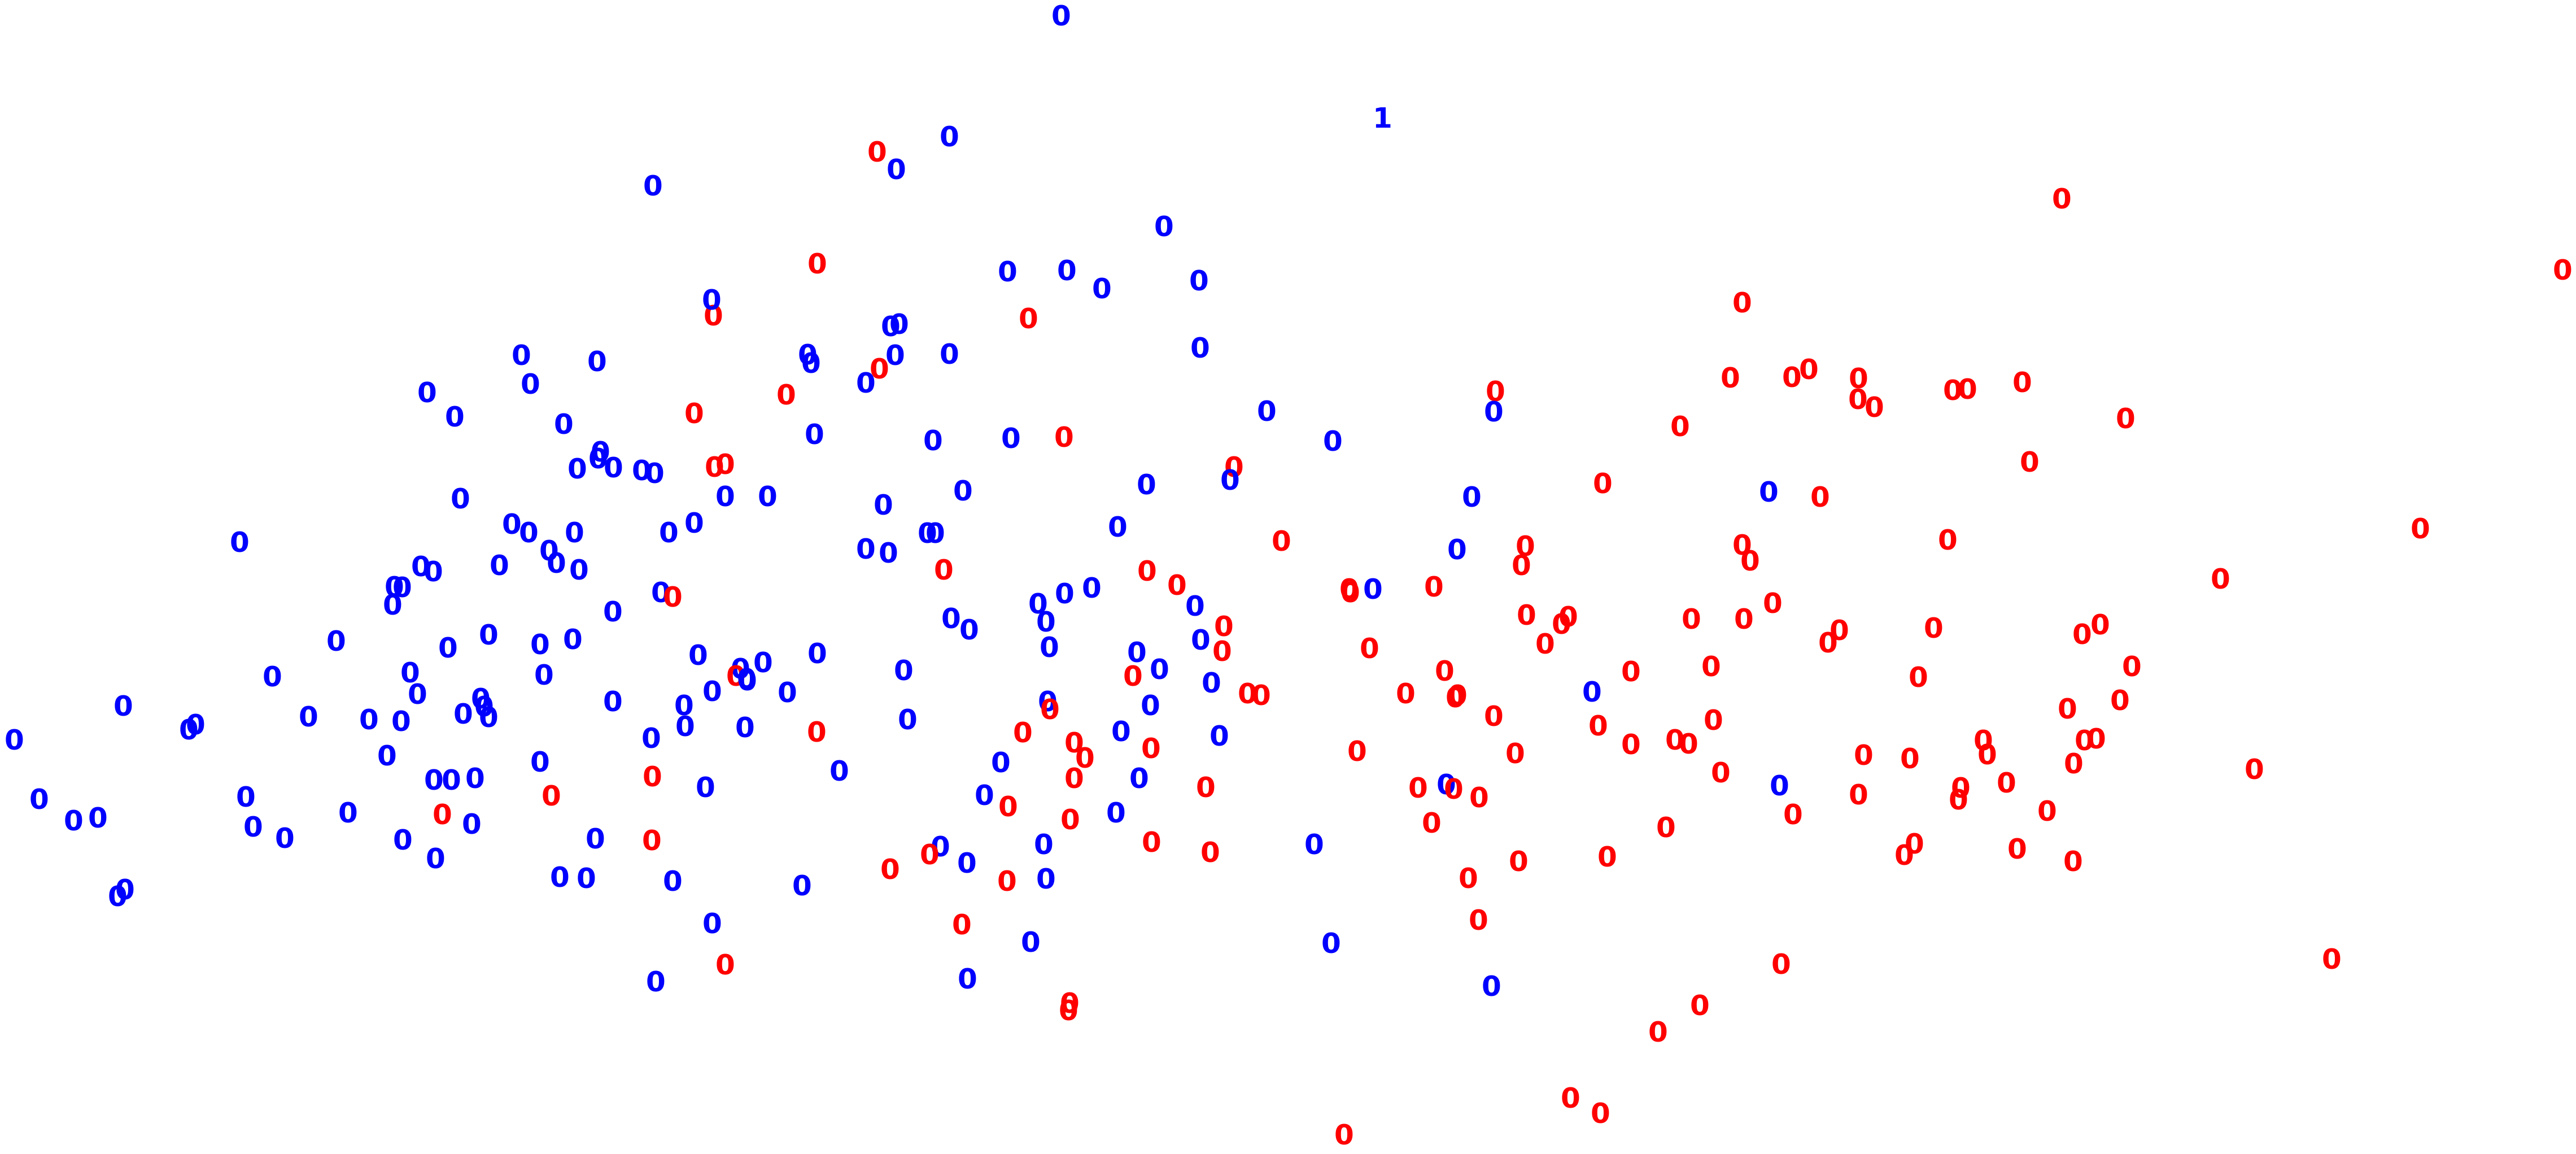

In [41]:
# apply PCA for visualization
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'

for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1],str(clusters[i]), color=colours[y[i]], fontdict={'weight':'bold', 'size': 50})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [42]:
print(metrics.adjusted_rand_score(y,clusters))
print(metrics.silhouette_score(X_std, clusters, metric='euclidean'))
# this model performance is the poorest among the all three models

-0.0009750554168186963
0.34854130862246135


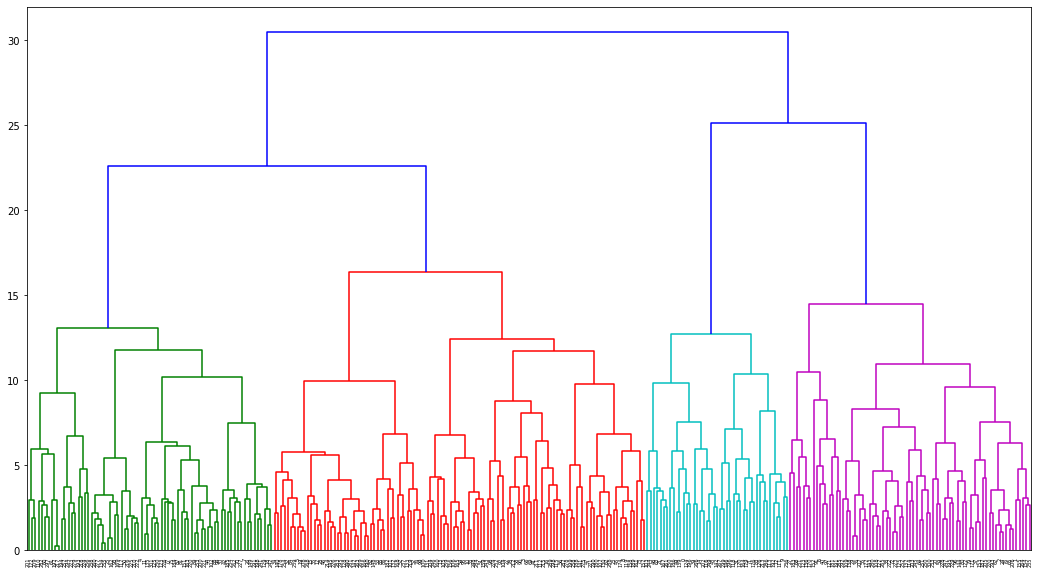

In [43]:
plt.figure(figsize=(18,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()